# Module 2 Code Challenge

Welcome to your Module 2 Code Challenge. This code challenge is designed to test your understanding of the Module 2 material. It covers:

- Statistical Distributions
- Statistical Tests
- Bayesian Statistics
- Linear Regression

_Read the instructions carefully_. You will be asked both to write code and respond to a few short answer questions.

### Note on the short answer questions: 

For the short answer questions _please use your own words_. The expectation is that you have **not** copied and pasted from an external source, even if you consult another source to help craft your response. While the short answer questions are not necessarily being assessed on grammatical correctness or sentence structure, you should do your best to communicate yourself clearly.

In [1]:
# Run this cell without changes to import the necessary libraries

# Use any additional libraries you like to complete this assessment 

import itertools
import numpy as np
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pickle

from sklearn.metrics import mean_squared_error, roc_curve, roc_auc_score, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.formula.api import ols

---
## Part 1: Statistical Distributions [Suggested time: 25 minutes]
---

### Normal Distributions

Say we have check totals for all checks ever written at a TexMex restaurant. 

The distribution for this population of check totals happens to be normally distributed with a population mean of $\mu = 20$ and population standard deviation of $\sigma = 2$. 

### 1.1) Write a function to compute the z-scores for single check of amount `check_amt`.

In [2]:
# Replace `pass` with appropriate code
def z_score(check_amt):
    """
    check_amt = the amount for which we want to compute the z-score
    """
    x=check_amt
    mu=20
    sigma=2
    z = (x-mu)/sigma
    return z

### 1.2) Use your function to compute the z-score for a 24 dollar check, and interpret the result using the empirical rule. 

In [3]:
z_score(24)

2.0

A z-score of 2 means that our given data point falls 2 standard deviations away from the mean. According to the emperical rule 95% of the data will fall between two standard deviations of the mean in either direction. Therefore, 95% of the data will fall between 24 and 16.

### 1.3) Using $\alpha = 0.05$, is the 24 dollar check significantly _greater_ than the mean? How do you know this?  

For reference, here is a link to a [z-table](https://www.math.arizona.edu/~rsims/ma464/standardnormaltable.pdf). 

In [9]:
prob=stats.norm.cdf(z_score(24))
prob

0.9772498680518208

In [10]:
p_val=1-prob
p_val

0.02275013194817921

A 24 dollar check is significantly greater than the mean because the p-value is less than the alpha value. The p-value represents the probability of a getting a value greater than or equal to 24 if the mean is 20. The p-value of 0.023 shows a 2.3% chance of getting values greater than or equal to 24 which is less than the alpha value of 5% showing significance.

### Confidence Intervals and the Central Limit Theorem

### 1.4) Determine the 95% confidence interval around the mean check total for this population. Interpret your result. 

In [13]:
#95% confidence 
z=stats.norm.ppf(q=0.975)
sigma=2
moe= z*sigma
mu=20
CI = (mu-moe,mu+moe)
CI

(16.080072030919894, 23.919927969080106)

There is a 95% probability that a given data point will fall between these numbers.

### 1.5) Imagine that we didn't know how the population of check totals was distributed. How would _sampling_ and the _Central Limit Theorem_ allow us to make inferences on the population mean, i.e. estimate $\mu, \sigma$ of the population mean?

If we take a large number of samples and plot the means of the samples, the means will produce a normal distribution. The mean of the sample means will approach the true mean of the population. The same can be said about the standard deviation

---
## Part 2: Statistical Testing [Suggested time: 15 minutes]
---

The TexMex restaurant recently introduced queso to its menu.

We have random samples of 1000 "no queso" order check totals and 1000 "queso" order check totals for orders made by different customers.

In the cell below, we load the sample data for you into the arrays `no_queso` and `queso` for the "no queso" and "queso" order check totals, respectively. Then, we create histograms of the distribution of the check amounts for the "no queso" and "queso" samples. 

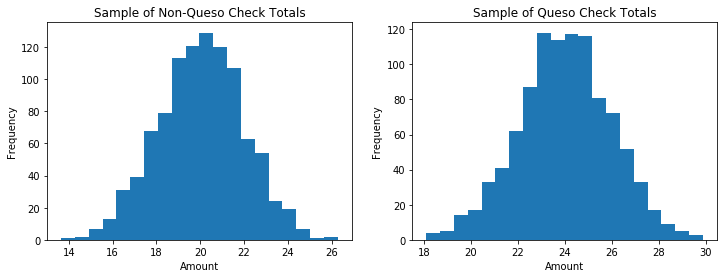

In [20]:
# Run this cell without changes

# Load the sample data 
no_queso = pickle.load(open('data/no_queso.pkl', 'rb'))
queso = pickle.load(open('data/queso.pkl', 'rb'))

# Plot histograms

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.set_title('Sample of Non-Queso Check Totals')
ax1.set_xlabel('Amount')
ax1.set_ylabel('Frequency')
ax1.hist(no_queso, bins=20)

ax2.set_title('Sample of Queso Check Totals')
ax2.set_xlabel('Amount')
ax2.set_ylabel('Frequency')
ax2.hist(queso, bins=20)
plt.show()

### Hypotheses and Errors

The restaurant owners want to know if customers who order queso spend **more or less** than customers who do not order queso.

### 2.1) Set up the null $H_{0}$ and alternative hypotheses $H_{A}$ for this test.

Null Hypothesis: Customers who order queso spend the same amount of money as customers who do not order queso.
Alternate Hypothesis: Customers who order queso dont spend the same amount of money as those who do not order queso.

### 2.2) What does it mean to make `Type I` and `Type II` errors in this specific context?

A type 1 error would rejecting the null hypothesis when it is actually true, false positive. In this context, it would mean that it is likely that the customers who order queso are spending a different amount of money on their orders but there actually is no significant difference in the amount of money they are spending.

A type 2 error would be failing to reject the null hypothesis when it should be rejected, or a false negative. In this context, it would mean that it is not likely that the customers who order queso are spending a different amount of money on their orders but there actually is a significant difference in the amount of money the two groups are spending.

### Sample Testing

### 2.3) Run a statistical test on the two samples. Can you reject the null hypothesis? 

Use a significance level of $\alpha = 0.05$. You can assume the two samples have equal variance.

You can use `scipy.stats` to find the answer if you like.  It has already been imported as `stats` and the statistical testing documentation can be found [here](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests).

In [22]:
results = stats.ttest_ind(no_queso, queso, equal_var=False)
print('T-statistic is ', results[0])
print('P-value is ', results[1])

T-statistic is  -45.1685774864633
P-value is  1.463174719189721e-307


The p-value is far less than the alpha value and the t-stat is extremley small.
With these values we can reject the null hypothesis.

---
## Part 3: Bayesian Statistics [Suggested time: 15 minutes]
---
### Bayes' Theorem

Thomas wants to get a new puppy 🐕 🐶 🐩 


<img src="https://media.giphy.com/media/rD8R00QOKwfxC/giphy.gif" />

He can choose to get his new puppy either from the pet store or the pound. The probability of him going to the pet store is $0.2$. 

He can choose to get either a large, medium or small puppy.

If he goes to the pet store, the probability of him getting a small puppy is $0.6$. The probability of him getting a medium puppy is $0.3$, and the probability of him getting a large puppy is $0.1$.

If he goes to the pound, the probability of him getting a small puppy is $0.1$. The probability of him getting a medium puppy is $0.35$, and the probability of him getting a large puppy is $0.55$.

### 3.1) What is the probability of Thomas getting a small puppy?
Show your work, not just the final result

In [23]:
# to get a small puppy we just look at the small puppy probabilty
prob_small = 0.2*0.6+0.8*0.1
prob_small


0.2

### 3.2) Given that he got a large puppy, what is the probability that Thomas went to the pet store?
Show your work, not just the final result

In [32]:
#P(pet store| large puppy)
prob_large_store = 0.2*0.1*0.2/0.1
prob_large_store

0.04000000000000001

### 3.3) Given that Thomas got a small puppy, is it more likely that he went to the pet store or to the pound?
Show your work, not just the final result

In [34]:
#Prob pet store
prob_small_store = 0.6*0.2/prob_small
print(prob_small_store)


#Prob pound
prob_small_pound = 0.1*0.8/prob_small
print(prob_small_pound)

# it is more likely he went to the store

0.6
0.4000000000000001


### 3.4) For Question 3.2, what are the prior, posterior, and likelihood?

In [ ]:
"""
prior = The known probabilities such as the probability of him getting a large puppy and going to the pet store
posterior = The conditional probability after we have a data set.
likelihood = This is the probability of Thomas going to the pet store and getting a large dog.
"""

---
## Part 4: Linear Regression [Suggested Time: 10 min]
---

In this section, you'll be using the Advertising data, and you'll be creating linear models that are more complicated than a simple linear regression. The relevant modules have already been imported at the beginning of this notebook. We'll load and prepare the dataset for you below.

In [26]:
# Run this cell without changes

data = pd.read_csv('data/advertising.csv').drop('Unnamed: 0', axis=1)
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [27]:
# Run this cell without changes

X = data.drop('sales', axis=1)
y = data['sales']

In the linear regression section of the curriculum, you analyzed how TV, Radio, and Newspaper spendings individually affected the Sales figures. Here, we'll use all three together in a multiple linear regression model!

### 4.1) Create a Correlation Matrix for `X`.

In [31]:
X.corr()

,TV,radio,newspaper
TV,1.000000,0.054809,0.056648
radio,0.054809,1.000000,0.354104
newspaper,0.056648,0.354104,1.000000


### 4.2) Based on this correlation matrix only, would you recommend to use `TV`, `radio`, and `newspaper` in the same multiple linear regression model?

### 4.3) Use StatsModels' `ols`-function to create a multiple linear regression model with `TV`, `radio`, and `newspaper` as independent variables and `sales` as the dependent variable. 

**Required output:** the model summary of this multiple regression model.

In [ ]:
# Code here 

### 4.4) Do we have any statistically significant coefficients? If the answer is yes, list them below.

In [ ]:
"""
Written answer here
"""